# Laboratório 6: Pesca

### Referente ao capítulo 11

Suponha que uma população de peixes é introduzida em um tanque artificial ou em uma região de água com redes.  Seja $x(t)$ o nível de peixes escalado em $t$, com $x(0) = x_0 > 0$. Os peixes inicialmente são pequenos e tem massa média um valor quase nula: trateremos como $0$. Após, a massa média é uma função 
$$
f_{massa}(t) = k\frac{t}{t+1},
$$
onde $k$ é o máximo de massa possivelmente atingido. Consideraremos $T$ suficientemente pequeno de forma que não haja reprodução de peixes. Seja $u(t)$ a taxa de colheita e $m$ a taxa de morte natural do peixe. Queremos maximizar a massa apanhada no intervalo, mas minimizando os custos envolvidos. Assim o problema é 

$$
\max_u \int_0^T Ak\frac{t}{t+1}x(t)u(t) - u(t)^2 dt, A \ge 0
$$
$$
\text{sujeito a  }x'(t) = -(m + u(t))x(t), x(0) = x_0,
$$
$$
0 \le u(t) \le M,
$$
onde $M$ é o limite físico da colheita. 

## Condições Necessárias 

### Hamiltoniano

$$
H = Ak\frac{t}{t+1}x(t)u(t) - u(t)^2 - \lambda(t)\left(m + u(t)\right)x(t)
$$

### Equação adjunta 

$$
\lambda '(t) = - Ak\frac{t}{t+1}u(t) + \lambda(t)\left(m + u(t)\right)
$$

### Condição de transversalidade 

$$
\lambda(T) = 0
$$

### Condição de otimalidade

$$
H_u = Ak\frac{t}{t+1}x(t) - 2u(t) - \lambda(t)x(t)
$$

$$
H_u < 0 \implies u^*(t) = 0 \implies x(t)\left(Ak\frac{t}{t+1} - \lambda(t)\right) < 0 
$$

$$
H_u = 0 \implies 0 \le u^*(t) = 0.5x(t)\left(Ak\frac{t}{t+1} - \lambda(t)\right) \le M
$$

$$
H_u > 0 \implies u^*(t) = M \implies 0.5x(t)\left(Ak\frac{t}{t+1} - \lambda(t)\right) > M
$$

Assim $u^*(t) = \min\left\{M, \max\left\{0, 0.5x(t)\left(Ak\frac{t}{t+1} - \lambda(t)\right)\right\}\right\}$

### Importanto as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp

import sys  
sys.path.insert(0, '../pyscripts/')

from optimal_control_class import OptimalControl

### Usando a biblitoca sympy 

In [2]:
t_sp, x_sp,u_sp,lambda_sp, k_sp, A_sp, m_sp = sp.symbols('t x u lambda k A m') 
H = A_sp*k_sp*(t_sp/(t_sp+1))*x_sp*u_sp - u_sp**2 - lambda_sp*(m_sp + u_sp)*x_sp
H

A*k*t*u*x/(t + 1) - lambda*x*(m + u) - u**2

In [3]:
print('H_x = {}'.format(sp.diff(H,x_sp)))
print('H_u = {}'.format(sp.diff(H,u_sp)))
print('H_lambda = {}'.format(sp.diff(H,lambda_sp)))

H_x = A*k*t*u/(t + 1) - lambda*(m + u)
H_u = A*k*t*x/(t + 1) - lambda*x - 2*u
H_lambda = -x*(m + u)


Resolvendo para $H_u = 0$

In [4]:
eq = sp.Eq(sp.diff(H,u_sp), 0)
sp.solve(eq,u_sp)

[x*(A*k*t - lambda*t - lambda)/(2*(t + 1))]

Aqui podemos descrever as funções necessárias para a classe. 

In [5]:
parameters = {'A': None, 'k': None, 'm': None, 'M': None}

diff_state = lambda t, x, u, par: -x*(par['m'] + u)
diff_lambda = lambda t, x, u, lambda_, par: - par['A']*par['k']*t*u/(t + 1) + lambda_*(par['m'] + u)
update_u = lambda t, x, lambda_, par: np.minimum(par['M'], np.maximum(0, 0.5*x*(par['A']*par['k']*t - lambda_*t - lambda_)/(t + 1)))

## Aplicando a classe ao exemplo 

Vamos fazer algumas exeperimentações. Sinta-se livre para variar os parâmetros. Nesse caso passaremos os limites como parâmetro do `solve`. 

In [6]:
problem = OptimalControl(diff_state, diff_lambda, update_u)

In [7]:
x0 = 0.4
T = 10
parameters['A'] = 5
parameters['k'] = 10
parameters['m'] = 0.2
parameters['M'] = 1

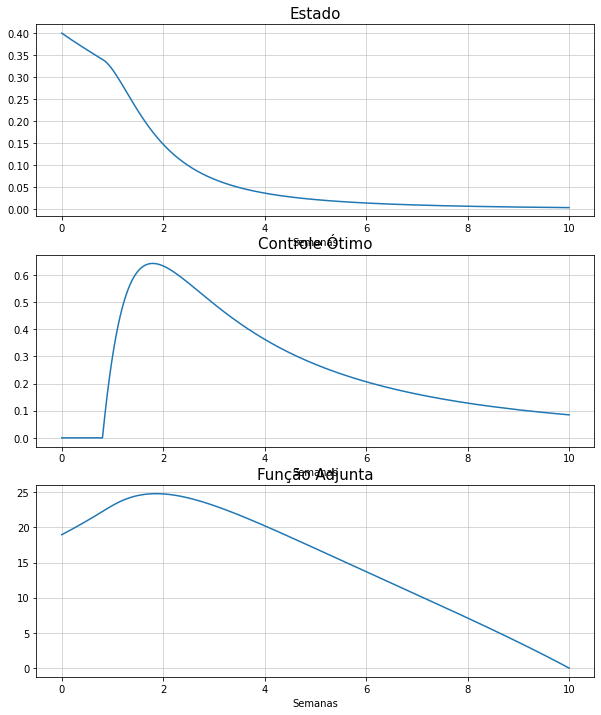

In [8]:
t,x,u,lambda_ = problem.solve(x0, T, parameters, bounds = [(0, parameters['M'])])
ax = problem.plotting(t,x,u,lambda_)
for i in range(3): 
    ax[i].set_xlabel('Semanas')
plt.show()

A estratégia ótima nesse caso inicia em $0$ e logo aumenta muito rapidamente, com um declínio posterior suave. A população é praticamente extinta no período considerado. O limite superior não teve efeito, dado que foi bem alto. Por isso, podemos testar com outros valores.

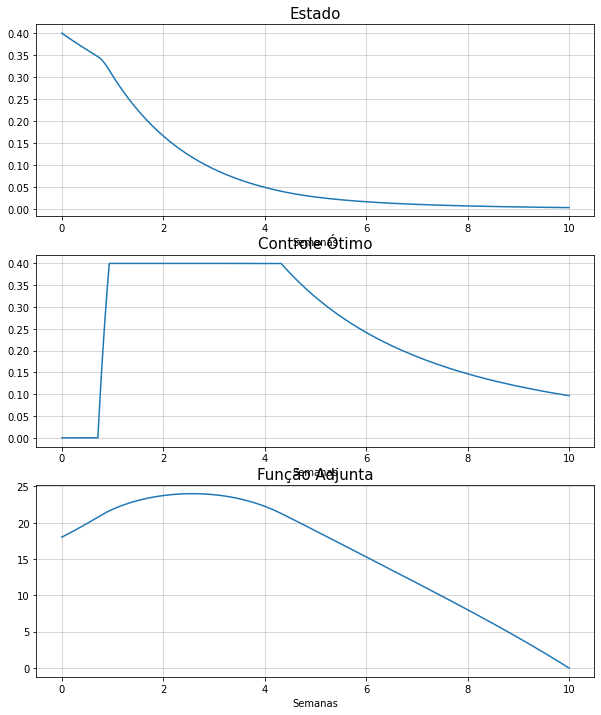

In [9]:
parameters['M'] = 0.4
t,x,u,lambda_ = problem.solve(x0, T, parameters, bounds = [(0, parameters['M'])])
ax = problem.plotting(t,x,u,lambda_)
for i in range(3): 
    ax[i].set_xlabel('Semanas')
plt.show()

Sugerimos que experimente a variação dos outros parâmetros. 

## Experimentação 

In [10]:
#N0 = 1
#T = 5
#parameters['r'] = 0.3
#parameters['a'] = 10
#parameters['delta'] = 0.4
#
#t,x,u,lambda_ = problem.solve(N0, T, parameters)
#roblem.plotting(t,x,u,lambda_)

### Este é o final do notebook